In [375]:
import random as sc
import numpy as np
import plotly.graph_objects as go

#### Initialize data tables

In [376]:
birthsobs=np.zeros(shape=(10,12),dtype=int) #Births observed in general
marybirthsobs=np.zeros(shape=(10,12),dtype=int) #Births of Marys observed

***Simulate data to populate data tables***
Births of the general population are all Unif(1000,2000) for every month.
Births of Marys are starting from Unif(5,15) in January and increasing as months pass by

In [377]:
for i in range(10):
    for j in range(12):
        birthsobs[i,j]=sc.randint(1000,2000) #Uniform 1000-2000 for all Births in general
        marybirthsobs[i,j]=sc.randint((j+1)*5,(j+1)*15) #Uniform starting 5-15 and adding as months pass by for Marys

In [378]:
likelihood=marybirthsobs/birthsobs

## Scenario with non informative prior

***Create a non informative prior***

In [379]:
noninfoprior=np.ones(12)/12

***Create of the infhistory array whose rows represent the posterior (updated) hypothesis every year. The first row represents the prior hypothesis at year 0, which is the non informative prior***

In [380]:
infhistory=np.zeros(shape=(11,12),dtype=float)

In [381]:
infhistory[0]=noninfoprior

In [382]:
for m in range(10):
    infhistory[m+1]=likelihood[m]*infhistory[m]/sum(likelihood[m]*infhistory[m])

***The Posterior Distribution for the non informative prior***

In [383]:
infhistory[10]

array([1.92907889e-12, 1.99484962e-09, 1.09001737e-07, 3.10392895e-06,
       1.55860369e-04, 9.72915800e-05, 6.15369241e-04, 4.54910694e-04,
       1.46605545e-02, 4.19619337e-02, 1.79767135e-01, 7.62283730e-01])

### Bar charts

In [384]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

##### For the first year

In [385]:
prior_bar=go.Bar(name='Prior hypothesis', x=months, y=infhistory[0])
likelihood_bar=go.Bar(name='Likelihood', x=months, y=likelihood[0])
posterior_bar=go.Bar(name='Posterior hypothesis', x=months, y=infhistory[1])

In [386]:
fig = go.Figure(data=[prior_bar, likelihood_bar, posterior_bar])

In [387]:
fig.update_layout(
    title='Prior, Likelihood and Posterior for Year 1',
    xaxis_title='Months',
    yaxis_title='Probability',
    barmode='group')

##### For the last year

In [388]:
prior_bar=go.Bar(name='Prior hypothesis', x=months, y=infhistory[0])
likelihood_bar=go.Bar(name='Likelihood', x=months, y=likelihood[9])
posterior_bar=go.Bar(name='Posterior hypothesis', x=months, y=infhistory[10])

In [389]:
fig = go.Figure(data=[prior_bar, likelihood_bar, posterior_bar])

In [390]:
fig.update_layout(
    title='Prior, Likelihood and Posterior for Year 10',
    xaxis_title='Months',
    yaxis_title='Probability',
    barmode='group')

***Comment: In the non informative scenario, given that the likelihood of the data is weighted more towards the last months, the posterior hypothesis, as anticipated, reflects this trend.***

## Scenario with informative prior

***Create an informative prior with weight on the first three months***

In [391]:
infprior=[0.1,0.8,0.1,0,0,0,0,0,0,0,0,0]

***The first row of the infhistory array represents the prior hypothesis at year 0, which is the informative prior***

In [392]:
infhistory[0]=infprior

In [393]:
for l in range(10):
    infhistory[l+1]=likelihood[l]*infhistory[l]/sum(likelihood[l]*infhistory[l])

***The Posterior Distribution for the informative prior***

In [394]:
infhistory[10]

array([1.54372668e-05, 1.27708725e-01, 8.72275837e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

### Bar charts

##### For the first year

In [395]:
prior_bar=go.Bar(name='Prior hypothesis', x=months, y=infhistory[0])
likelihood_bar=go.Bar(name='Likelihood', x=months, y=likelihood[0])
posterior_bar=go.Bar(name='Posterior hypothesis', x=months, y=infhistory[1])

In [396]:
fig = go.Figure(data=[prior_bar, likelihood_bar, posterior_bar])

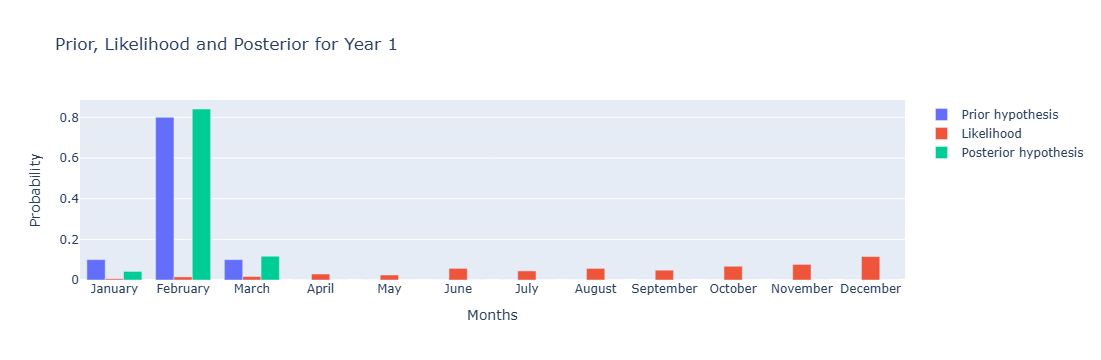

In [397]:
fig.update_layout(
    title='Prior, Likelihood and Posterior for Year 1',
    xaxis_title='Months',
    yaxis_title='Probability',
    barmode='group')

##### For the last year

In [398]:
prior_bar=go.Bar(name='Prior hypothesis', x=months, y=infhistory[0])
likelihood_bar=go.Bar(name='Likelihood', x=months, y=likelihood[9])
posterior_bar=go.Bar(name='Posterior hypothesis', x=months, y=infhistory[10])

In [399]:
fig = go.Figure(data=[prior_bar, likelihood_bar, posterior_bar])

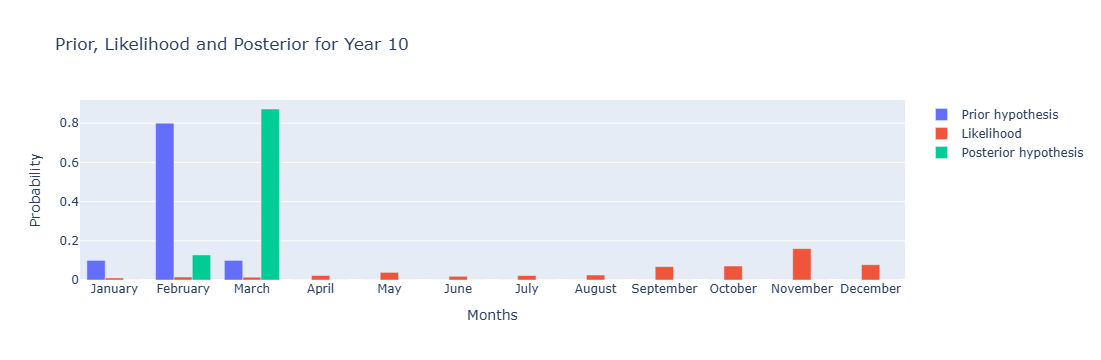

In [400]:
fig.update_layout(
    title='Prior, Likelihood and Posterior for Year 10',
    xaxis_title='Months',
    yaxis_title='Probability',
    barmode='group')

***Comment: In the informative scenario, because the prior hypothesis was weighted at zero for the last nine months and only above zero for the first three months, the posterior hypothesis had to remain zero for the last nine months, regardless of the data's likelihood.***